### The point is to make the QSVM work faster.

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [106]:
X, y = make_classification(n_samples=1000, n_features=5, random_state=137)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=137)

In [108]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       146
           1       0.90      0.92      0.91       154

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [109]:
n_procs = range(2, 20)

In [110]:
time_proc = []
for n_proc in n_procs:
    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}   
    tic = time.time()
    grid = GridSearchCV(SVC(probability=True), 
                        param_grid,
                        n_jobs=n_proc,
                        refit=True, verbose=1)
    grid.fit(X_train, y_train)
    toc = time.time()
    time_proc.append(toc-tic)
    print(f'Total time: {toc - tic:.2f} seconds')    

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 3.97 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 2.88 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 2.44 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 2.29 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 2.07 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.82 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.28 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.61 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 0.86 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.70 seconds
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Total time: 1.04 seconds
Fitting 5 folds for each of 25 candidates, 

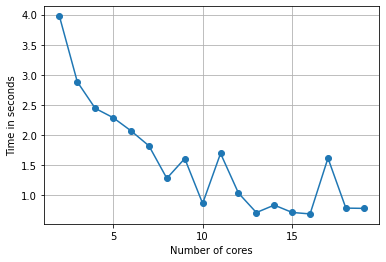

In [111]:
ax = plt.figure().gca()
plt.plot(n_procs, time_proc, '-o')
plt.xlabel('Number of cores')
plt.ylabel('Time in seconds')
plt.grid()
ax.xaxis.get_major_locator().set_params(integer=True);

In [112]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [113]:
grid.best_estimator_

SVC(C=1, gamma=1, probability=True)

In [114]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       146
           1       0.93      0.91      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Quantum Models

In [131]:
X, y = make_classification(1000, 4, random_state=137)

In [150]:
X[0][::-1]

array([ 0.99478782, -1.15013647,  0.54293503, -0.03639866])

In [152]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap

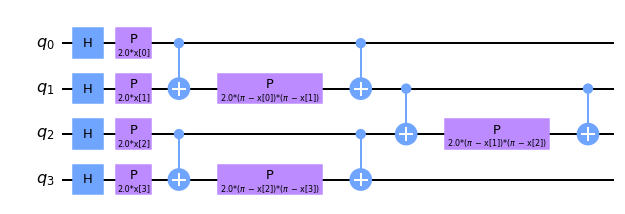

In [153]:
zf = ZZFeatureMap(4, reps=1, entanglement='pairwise').decompose()
zf.draw('mpl')

In [154]:
zf.assign_parameters(dict(
        zip(zf.parameters, X[0][::-1])
    ), inplace=True
)

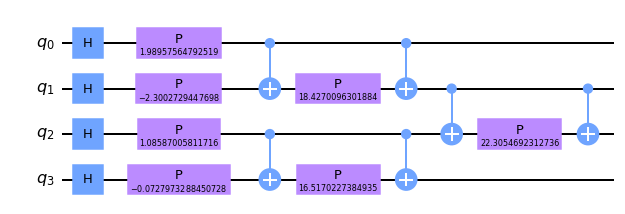

In [155]:
zf.draw('mpl')

In [156]:
from qiskit.quantum_info import Statevector

In [157]:
state = Statevector.from_int(0, 2**4).evolve(zf)

In [158]:
state

Statevector([ 0.25      +0.j        ,  0.00094174+0.24999823j,
              0.18577687+0.16729302j, -0.24999836-0.00090584j,
             -0.14898864+0.20075454j, -0.20131435-0.14823135j,
             -0.16910788+0.18412639j,  0.00335888-0.24997743j,
             -0.18524595-0.16788073j,  0.16718172-0.18587703j,
             -0.02531656-0.24871484j,  0.18463644+0.16855084j,
             -0.06025166-0.24263087j,  0.24240218-0.06116522j,
             -0.03462587-0.24759049j,  0.19082743+0.16150817j],
            dims=(2, 2, 2, 2))
